<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/HeatDemandDensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:

from google.colab import drive
drive.mount('/content/saj')

Drive already mounted at /content/saj; to attempt to forcibly remount, call drive.mount("/content/saj", force_remount=True).


In [71]:
import pandas as pd

In [77]:
names=['AT','RH','G','Gb','Gd','IR','WS','WD','SP','HD','mfr','mfrr']
features=pd.read_excel('/content/saj/MyDrive/cl vs mf.xlsx', names = names)
features.head()
labels=features['HD']
features=features.drop(['mfr','mfrr'], 1)

In [78]:
import sklearn

In [79]:
#using scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
train_features, test_features, train_labels, test_labels=train_test_split(features, labels, test_size=0.25, random_state=10)



In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

print('training features shape:', train_features.shape)
print('training labels shape:', train_labels.shape)
print('testing features shape:', test_features.shape)
print('testing labels shape:', test_labels.shape)

training features shape: (6570, 10)
training labels shape: (6570,)
testing features shape: (2190, 10)
testing labels shape: (2190,)


In [81]:
features.head()

pearsoncorr = features.corr(method = 'pearson')
pearsoncorr

,AT,RH,G,Gb,Gd,IR,WS,WD,SP,HD
AT,1.000000,-0.238859,0.296962,0.236694,0.242071,0.857073,0.467998,-0.378033,-0.589059,-0.916598
RH,-0.238859,1.000000,-0.555024,-0.537701,-0.435713,-0.156422,0.013586,-0.105384,0.365604,0.162026
G,0.296962,-0.555024,1.000000,0.908652,0.804480,0.367200,0.186938,0.031127,-0.259775,-0.214558
Gb,0.236694,-0.537701,0.908652,1.000000,0.561422,0.270797,0.136518,0.025664,-0.225432,-0.159991
Gd,0.242071,-0.435713,0.804480,0.561422,1.000000,0.339610,0.186560,0.059504,-0.193207,-0.149138
IR,0.857073,-0.156422,0.367200,0.270797,0.339610,1.000000,0.515245,-0.347263,-0.632294,-0.793515
WS,0.467998,0.013586,0.186938,0.136518,0.186560,0.515245,1.000000,-0.244306,-0.374074,-0.371466
WD,-0.378033,-0.105384,0.031127,0.025664,0.059504,-0.347263,-0.244306,1.000000,-0.020187,0.324808
SP,-0.589059,0.365604,-0.259775,-0.225432,-0.193207,-0.632294,-0.374074,-0.020187,1.000000,0.566110
HD,-0.916598,0.162026,-0.214558,-0.159991,-0.149138,-0.793515,-0.371466,0.324808,0.566110,1.000000


In [82]:
import matplotlib.pyplot as plt
import seaborn as sbr
%matplotlib inline





1.   AT: 2-m air temperature (degree Celsius)
2.   RH: relative humidity (%)

3.   G(h): Global irradiance on the horizontal plane (W/m2)
4.   Gb(n): Beam/direct irradiance on a plane always normal to sun rays (W/m2)

5.   Gd(h): Diffuse irradiance on the horizontal plane (W/m2)
6.   IR(h): Surface infrared (thermal) irradiance on a horizontal plane (W/m2)

7.   WS: 10-m total wind speed (m/s)
8.   WD: 10-m wind direction (0 = N  90 = E) (degree)

9.   SP: Surface (air) pressure (Pa)
10.  HD: Heat Demand Density




















(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

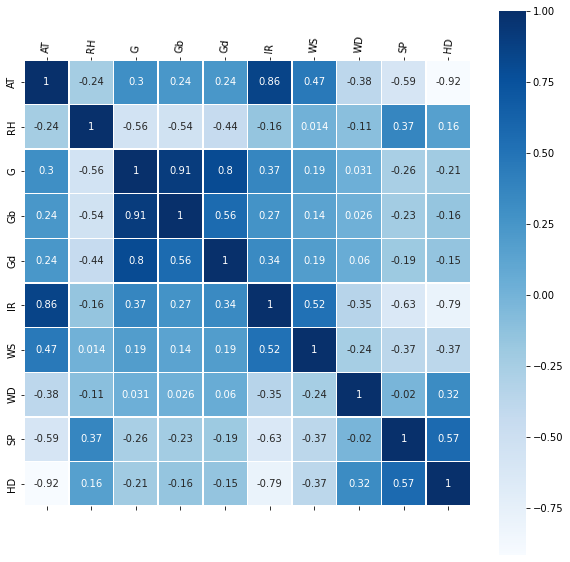

In [83]:

#ax = fig.add_subplot(111)
fig, ax=fig, ax = plt.subplots(figsize= (10,10))
cax = ax.matshow(features,cmap='Blues', vmin=-1, vmax=1)
sbr.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='Blues', annot=True, linewidth= 0.5 )
plt.xticks(rotation=85)

In [84]:
#myfeatures = features[["AT","IR","WS","WD","SP","HD"]]
#myfeatures.head()

In [85]:
!pip install xgboost

In [86]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [87]:
data_dmatrix = xgb.DMatrix(data=myfeatures,label=labels)

In [88]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.2,
                max_depth = 6, alpha = 10, n_estimators = 20)

In [89]:
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

[12:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
import numpy as np

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 532479.815191


In [92]:
from sklearn.metrics import r2_score
R2_score=r2_score(y_test, y_pred)
R2_score

0.9720809227438856

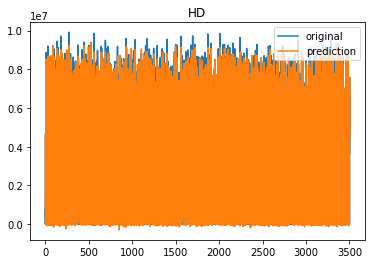

In [93]:
x_ax = range ( len(y_test))
plt.plot(x_ax,y_test, label ="original")
plt.plot(x_ax,y_pred, label = "prediction")
plt.title("HD")
plt.legend()
plt.show()